In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [4]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
def plot3(X , title , vtitle):
    colors = ['navy', 'turquoise', 'darkorange']
    plt.figure()
    for i , color , target_name in zip( [0,1,2],colors , target_names):
        plt.scatter(X[y==i , 0] , X[y==i , 1] , color=color ,label=target_name)
    plt.legend(loc='best')
    plt.title(title)
    plt.xlabel(vtitle + '1')
    plt.ylabel(vtitle + '2')
    plt.show()

Epoch 1/4
8/8 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 2/4
8/8 [==============================] - 0s 2ms/step - loss: 0.0705
Epoch 3/4
8/8 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 4/4
8/8 [==============================] - 0s 2ms/step - loss: 0.0698


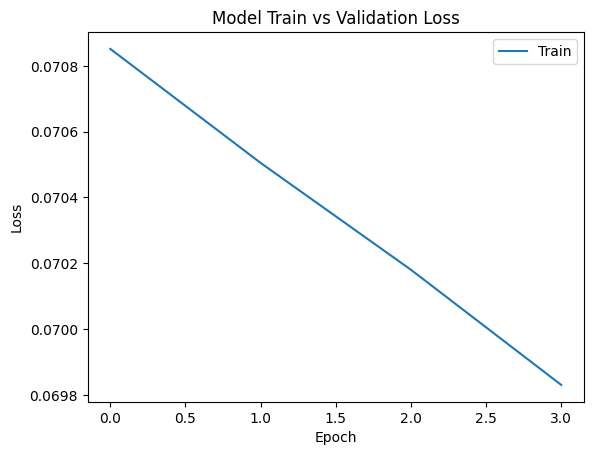

5/5 [==============================] - 0s 1ms/step


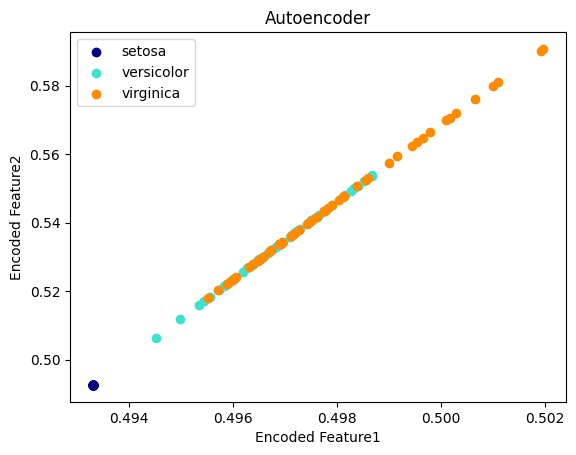

In [17]:
from sklearn.model_selection import train_test_split

X_train , X_test , _ , _= train_test_split(X_scaled , y , test_size=0.2 , random_state=42)

input_layer=  Input(shape=(X.shape[1],))
encoder_layer = Dense(2 , activation='relu')(input_layer)
decoder_layer = Dense(X.shape[1] , activation='sigmoid')(encoder_layer)

ae = Model(input_layer , decoder_layer)
ae.compile(optimizer='adam' , loss='mean_squared_error')
history = ae.fit(X_train , X_train , epochs=4, batch_size=16 , shuffle=True)
plt.plot(history.history['loss'])
plt.title('Model Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
encoded = ae.predict(X_scaled)
plot3(encoded , 'Autoencoder' , 'Encoded Feature')